##   R मा Pandas को प्रयोग

हामीले R मा pandas को प्रयोग समाधान गर्न dplyr लाइब्रेरी प्रयोग गर्नुपर्छ। हामी सामान्य डेटा विज्ञान लाइब्रेरी आयात गरेर सुरु गर्नेछौं।


In [28]:
options(warn=-1)
library(dplyr)
library(tidyverse)
library(lubridate)
library(zoo)
library(xts)
library('ggplot2')

सिरिज सूची वा 1D-एरे जस्तै हो, तर यसमा इन्डेक्स हुन्छ। सबै अपरेसनहरू इन्डेक्ससँग मिल्दोजुल्दो हुन्छन्। R मा पङ्क्तिको इन्डेक्सिङ गर्न, हामीले row.names प्रयोग गर्नुपर्छ।


In [29]:
a<- 1:9

In [30]:
b = c("I","like","to","use","Python","and","Pandas","very","much")

In [31]:
a1 = length(a)
b1 = length(b)

In [32]:
a = data.frame(a,row.names = c(1:a1))
print(a)

  a
1 1
2 2
3 3
4 4
5 5
6 6
7 7
8 8
9 9


In [33]:
b = data.frame(b,row.names = c(1:b1))
print(b)

       b
1      I
2   like
3     to
4    use
5 Python
6    and
7 Pandas
8   very
9   much


सिरिजको एक सामान्य प्रयोग समय सिरिज हो। समय सिरिजमा, इन्डेक्सको विशेष संरचना हुन्छ - सामान्यतया मिति वा समयको दायरा। समय सिरिज बनाउनको लागि ts function प्रयोग गर्ने सबैभन्दा सजिलो तरिका हो। तर, हामी समय सिरिज कार्यान्वयन गर्न अर्को तरिका प्रयास गर्नेछौं। मितिहरूको इन्डेक्स बनाउन seq function प्रयोग गर्नको लागि हामीलाई lubridate library प्रयोग गर्नुपर्छ।

मानौं, हामीसँग एउटा सिरिज छ जसले प्रत्येक दिन किनेको उत्पादनको मात्रा देखाउँछ, र हामीलाई थाहा छ कि प्रत्येक आइतबार हामीले आफ्नै लागि एउटा अतिरिक्त वस्तु पनि लिनुपर्छ। यहाँ सिरिज प्रयोग गरेर यसलाई कसरी मोडल गर्ने:


In [34]:
# We will use ggplot2 for visualizing the data
# If you want to change the plot size repr library will be used
library(repr)
options(repr.plot.width = 12,repr.plot.height=6)

[1] "length of index is  366"


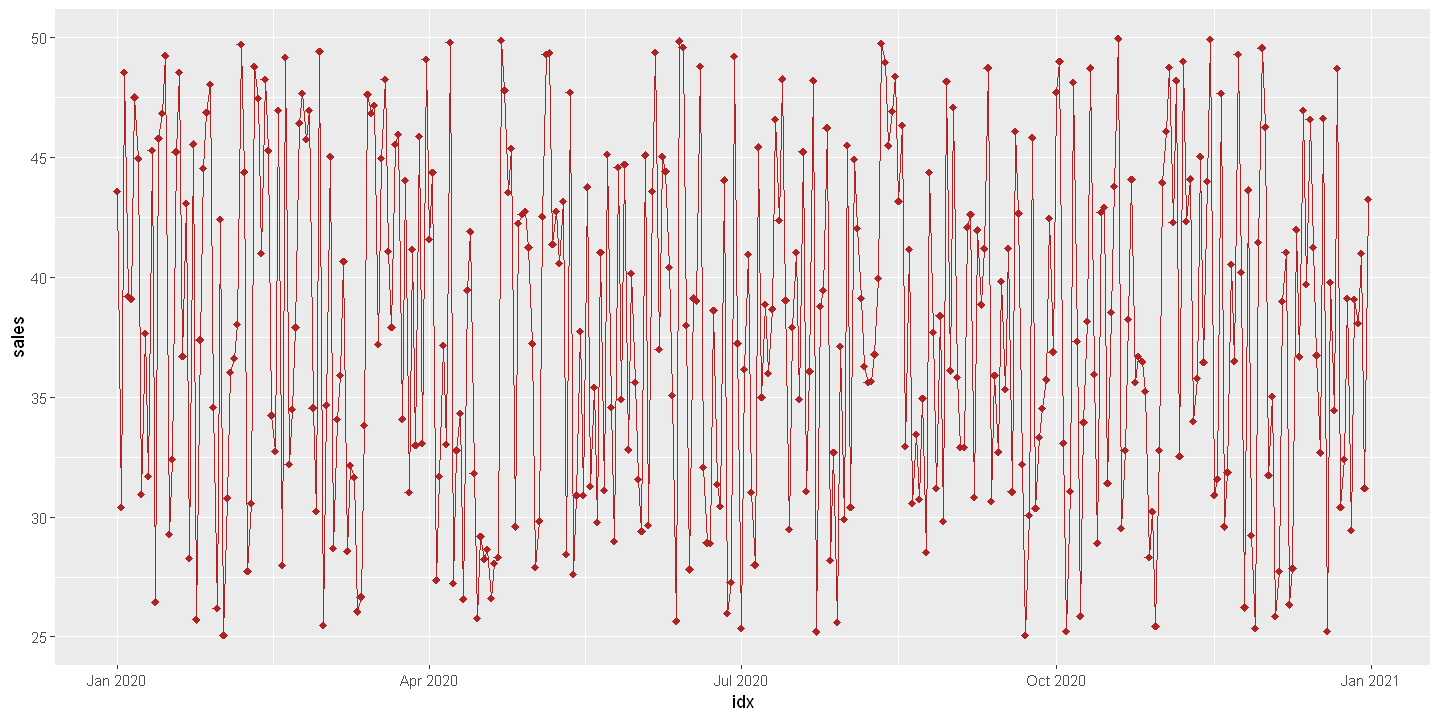

In [35]:
start_date <- mdy("Jan 1, 2020")
end_date <- mdy("Dec 31, 2020")
idx = seq(start_date,end_date,by ='day')
print(paste("length of index is ",length(idx)))
size = length(idx)
sales = runif(366,min=25,max=50)
sold_items <- data.frame(row.names=idx[0:size],sales)
ggplot(sold_items,aes(x=idx,y=sales)) + geom_point(color = "firebrick", shape = "diamond", size = 2) +
    geom_line(color = "firebrick", size = .3)

हामी additional_items र sold_items लाई एकसाथ जोड्दैछौं ताकि हामी कुल उत्पादनहरूको संख्या पत्ता लगाउन सकौं। 
जस्तो कि तपाईं देख्न सक्नुहुन्छ, यहाँ कुल संख्या पत्ता लगाउन समस्या भइरहेको छ, हामी NaN मान प्राप्त गर्दैछौं किनभने साप्ताहिक श्रृंखलामा उल्लेख नगरिएका दिनहरूलाई हराएको (NaN) मानिन्छ। यदि हामी NaN लाई कुनै संख्यामा जोड्छौं भने त्यसले NaN दिन्छ। 
जोड गर्नको लागि, हामीले NaN लाई 0 ले प्रतिस्थापन गर्न आवश्यक छ।


In [36]:
index = seq(start_date,end_date,by = 'week')
sz = length(index)
additional_product <- rep(10,53)
additional_items  <- data.frame(row.names = index[0:sz],additional_product)
additional_items
# we are merging two dataframe so that we can add
additional_item = merge(additional_items,sold_items, by = 0, all = TRUE)[-1] 
total  = data.frame(row.names=idx[0:size],additional_item$additional_product + additional_item$sales)
colnames(total) =  c('total')
total

additional_product
2020-01-01 10                
2020-01-08 10                
2020-01-15 10                
2020-01-22 10                
2020-01-29 10                
2020-02-05 10                
2020-02-12 10                
2020-02-19 10                
2020-02-26 10                
2020-03-04 10                
2020-03-11 10                
2020-03-18 10                
2020-03-25 10                
2020-04-01 10                
2020-04-08 10                
2020-04-15 10                
2020-04-22 10                
2020-04-29 10                
2020-05-06 10                
2020-05-13 10                
2020-05-20 10                
2020-05-27 10                
2020-06-03 10                
2020-06-10 10                
2020-06-17 10                
2020-06-24 10                
2020-07-01 10                
2020-07-08 10                
2020-07-15 10                
2020-07-22 10                
2020-07-29 10                
2020-08-05 10                
2020-08-12 10                
2020-08-19 10                
2020-08-26 10                
2020-09-02 10                
2020-09-09 10                
2020-09-16 10                
2020-09-23 10                
2020-09-30 10                
2020-10-07 10                
2020-10-14 10                
2020-10-21 10                
2020-10-28 10                
2020-11-04 10                
2020-11-11 10                
2020-11-18 10                
2020-11-25 10                
2020-12-02 10                
2020-12-09 10                
2020-12-16 10                
2020-12-23 10                
2020-12-30 10

total   
2020-01-01 53.59979
2020-01-02       NA
2020-01-03       NA
2020-01-04       NA
2020-01-05       NA
2020-01-06       NA
2020-01-07       NA
2020-01-08 40.93455
2020-01-09       NA
2020-01-10       NA
2020-01-11       NA
2020-01-12       NA
2020-01-13       NA
2020-01-14       NA
2020-01-15 59.24704
2020-01-16       NA
2020-01-17       NA
2020-01-18       NA
2020-01-19       NA
2020-01-20       NA
2020-01-21       NA
2020-01-22 38.26416
2020-01-23       NA
2020-01-24       NA
2020-01-25       NA
2020-01-26       NA
2020-01-27       NA
2020-01-28       NA
2020-01-29 44.58327
2020-01-30       NA
...        ...     
2020-12-02 41.74811
2020-12-03       NA
2020-12-04       NA
2020-12-05       NA
2020-12-06       NA
2020-12-07       NA
2020-12-08       NA
2020-12-09 37.85650
2020-12-10       NA
2020-12-11       NA
2020-12-12       NA
2020-12-13       NA
2020-12-14       NA
2020-12-15       NA
2020-12-16 46.73560
2020-12-17       NA
2020-12-18       NA
2020-12-19       NA
2020-12-20       NA
2020-12-21       NA
2020-12-22       NA
2020-12-23 40.42143
2020-12-24       NA
2020-12-25       NA
2020-12-26       NA
2020-12-27       NA
2020-12-28       NA
2020-12-29       NA
2020-12-30 41.20298
2020-12-31       NA

In [37]:
additional_item[is.na(additional_item)] = 0
total  = data.frame(row.names=idx[0:size],additional_item$additional_product + additional_item$sales)
colnames(total) =  c('total')
total

total   
2020-01-01 53.59979
2020-01-02 30.41127
2020-01-03 48.54839
2020-01-04 39.20897
2020-01-05 39.09894
2020-01-06 47.53019
2020-01-07 44.94766
2020-01-08 40.93455
2020-01-09 37.66561
2020-01-10 31.68825
2020-01-11 45.30576
2020-01-12 26.45509
2020-01-13 45.81249
2020-01-14 46.84547
2020-01-15 59.24704
2020-01-16 29.28688
2020-01-17 32.41731
2020-01-18 45.23295
2020-01-19 48.54330
2020-01-20 36.69353
2020-01-21 43.09588
2020-01-22 38.26416
2020-01-23 45.56863
2020-01-24 25.70944
2020-01-25 37.38721
2020-01-26 44.53955
2020-01-27 46.88427
2020-01-28 48.05540
2020-01-29 44.58327
2020-01-30 26.19490
...        ...     
2020-12-02 41.74811
2020-12-03 35.03915
2020-12-04 25.84637
2020-12-05 27.73147
2020-12-06 39.00993
2020-12-07 41.03187
2020-12-08 26.33862
2020-12-09 37.85650
2020-12-10 41.98943
2020-12-11 36.68901
2020-12-12 46.96883
2020-12-13 39.70374
2020-12-14 46.59464
2020-12-15 41.24742
2020-12-16 46.73560
2020-12-17 32.68275
2020-12-18 46.64238
2020-12-19 25.22163
2020-12-20 39.79997
2020-12-21 34.45013
2020-12-22 48.71183
2020-12-23 40.42143
2020-12-24 32.41991
2020-12-25 39.12296
2020-12-26 29.43616
2020-12-27 39.09337
2020-12-28 38.09288
2020-12-29 41.00681
2020-12-30 41.20298
2020-12-31 43.25232

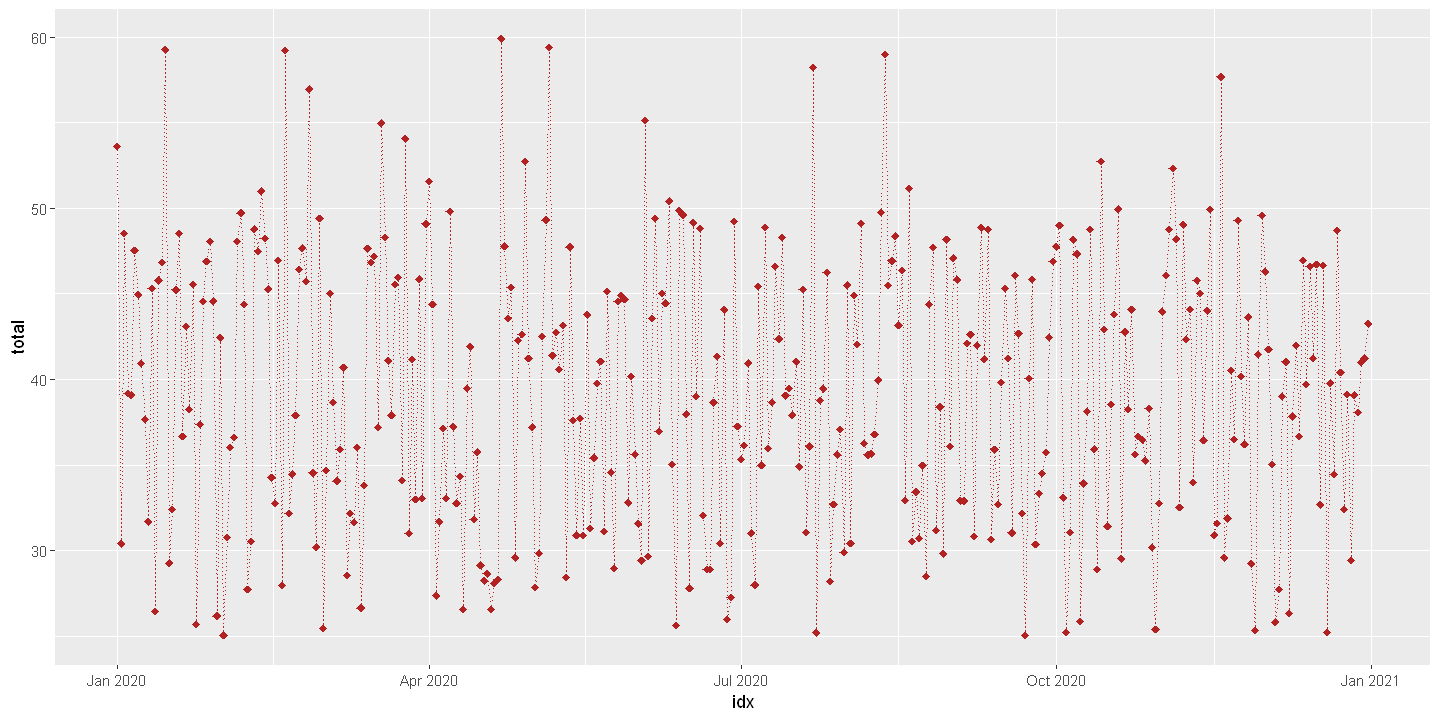

In [38]:
ggplot(total,aes(x=idx,y=total)) + geom_point(color = "firebrick", shape = "diamond", size = 2) +
    geom_line(color = "firebrick", linetype = "dotted", size = .3)

हामी मासिक आधारमा कुल उत्पादनको संख्या विश्लेषण गर्न चाहन्छौं। त्यसैले, हामी महिनाको कुल उत्पादनको औसत निकाल्छौं र बारग्राफ बनाउँछौं।


In [39]:
index = seq(start_date,end_date,by ='month')


              total
2020-01-31 41.03847
2020-02-29 40.91568
2020-03-31 39.27424
2020-04-30 37.63589
2020-05-31 38.75129
2020-06-30 38.75744
2020-07-31 38.35212
2020-08-31 40.43712
2020-09-30 38.90043
2020-10-31 37.99855
2020-11-30 41.20759
2020-12-31 38.46355

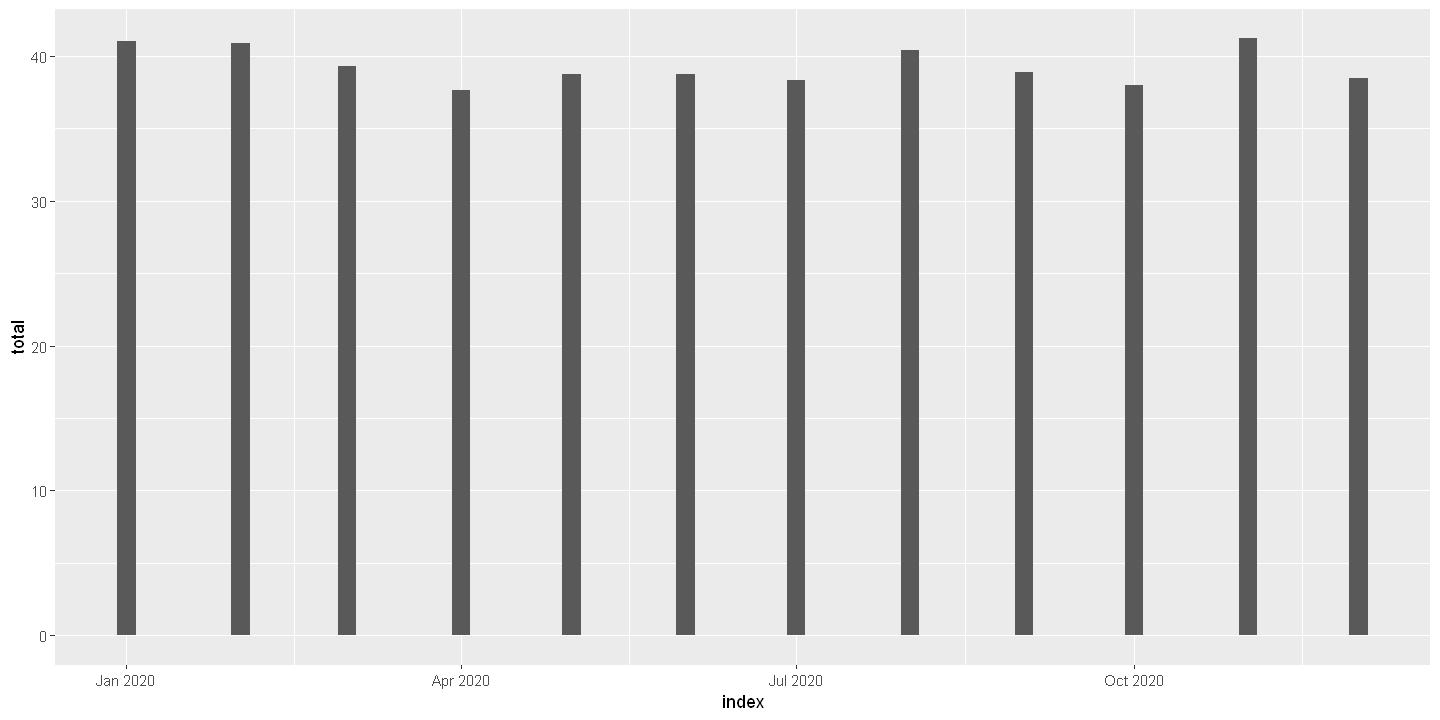

In [40]:
x<- as.xts(total, dateFormat ="Date")
(monthly<-apply.monthly(x,mean))
ggplot(monthly, aes(x=index, y=total)) + 
  geom_bar(stat = "identity", width=5) 

## डाटा फ्रेम  
डाटा फ्रेम मूलतः एउटै इन्डेक्स भएका सिरिजहरूको संग्रह हो। हामी धेरै सिरिजहरूलाई सँगै राखेर डाटा फ्रेम बनाउन सक्छौं।  
उदाहरणका लागि, हामी a र b सिरिजहरूको डाटा फ्रेम बनाउँदैछौं।  


In [41]:
a = data.frame(a,row.names = c(1:a1))

In [42]:
b = data.frame(b,row.names = c(1:b1))

In [43]:
df<- data.frame(a,b)
df

a b     
1 1 I     
2 2 like  
3 3 to    
4 4 use   
5 5 Python
6 6 and   
7 7 Pandas
8 8 very  
9 9 much

हामीले rename फंक्शन प्रयोग गरेर स्तम्भको नाम पनि परिवर्तन गर्न सक्छौं।


In [44]:
df = 
  rename(df,
    A = a,
    B = b,
  )

In [45]:
df

A B     
1 1 I     
2 2 like  
3 3 to    
4 4 use   
5 5 Python
6 6 and   
7 7 Pandas
8 8 very  
9 9 much

हामी select function प्रयोग गरेर dataframe मा एउटा स्तम्भ पनि चयन गर्न सक्छौं।


In [46]:
cat("Column A (series):\n")
select(df,'A')

Column A (series):


A
1 1
2 2
3 3
4 4
5 5
6 6
7 7
8 8
9 9

हामी श्रृंखलामा निश्चित तार्किक मापदण्ड पूरा गर्ने पंक्तिहरू निकाल्नेछौं


In [47]:
df[df$A<5,]

A B   
1 1 I   
2 2 like
3 3 to  
4 4 use

In [48]:
df[df$A>5 & df$A<7,]

A B  
6 6 and

नयाँ स्तम्भहरू बनाउँदै।

तलको कोडले एउटा श्रृंखला बनाउँछ जसले 'a' को यसको औसत मानबाट विचलन गणना गर्छ र त्यसपछि यसलाई पहिले नै रहेको डेटा फ्रेममा मर्ज गर्छ।


In [49]:
df$DivA <- df$A - mean(df$A)

In [50]:
df

A B      DivA
1 1 I      -4  
2 2 like   -3  
3 3 to     -2  
4 4 use    -1  
5 5 Python  0  
6 6 and     1  
7 7 Pandas  2  
8 8 very    3  
9 9 much    4

हामी एउटा श्रृंखला सिर्जना गर्दैछौं जसले A स्तम्भको स्ट्रिङको लम्बाइ गणना गर्छ र त्यसपछि यसलाई विद्यमान डाटाफ्रेममा मर्ज गर्छ।


In [51]:
df$LenB <- str_length(df$B)

In [52]:
df

A B      DivA LenB
1 1 I      -4   1   
2 2 like   -3   4   
3 3 to     -2   2   
4 4 use    -1   3   
5 5 Python  0   6   
6 6 and     1   3   
7 7 Pandas  2   6   
8 8 very    3   4   
9 9 much    4   4

संख्याहरूको आधारमा पंक्तिहरू चयन गर्दै


In [53]:
df[0:5,]

A B      DivA LenB
1 1 I      -4   1   
2 2 like   -3   4   
3 3 to     -2   2   
4 4 use    -1   3   
5 5 Python  0   6

***समूह बनाउने भनेको केहि सर्तहरूका आधारमा धेरै स्तम्भहरूलाई समूह बनाउनु हो, र फरक देखाउन summarise function प्रयोग गरिन्छ।***

मानौं, हामी प्रत्येक दिइएको LenB को संख्याका लागि स्तम्भ A को औसत मान गणना गर्न चाहन्छौं। त्यसो भए, हामी हाम्रो DataFrame लाई LenB द्वारा समूह गर्न सक्छौं, र औसत निकालेर त्यसलाई A भनेर नाम दिन सक्छौं।


In [54]:
df1 = df %>% group_by(LenB) %>% summarise(a = mean(A))

In [55]:
df1

LenB a       
1 1    1.000000
2 2    3.000000
3 3    5.000000
4 4    6.333333
5 6    6.000000

In [56]:
df2 = df %>% group_by(LenB) %>%
summarise(MEAN = mean(A),count =length(DivA))

## प्रिन्टिङ र प्लटिङ  
जब हामी head(df) कल गर्छौं, यसले डाटाफ्रेमलाई टेबलको रूपमा प्रिन्ट गर्छ।  

कुनै पनि डाटा साइन्स प्रोजेक्टको पहिलो चरण डाटा सफा गर्ने र दृश्यात्मक बनाउने हो, त्यसैले डाटासेटलाई दृश्यात्मक बनाउनु र केही उपयोगी जानकारी निकाल्नु महत्त्वपूर्ण छ।  


In [57]:
#dataset = read.csv("file name")

In [58]:
head(df)

A B      DivA LenB
1 1 I      -4   1   
2 2 like   -3   4   
3 3 to     -2   2   
4 4 use    -1   3   
5 5 Python  0   6   
6 6 and     1   3

ggplot2 एक धेरै राम्रो पुस्तकालय हो किनभने यो डेटा फ्रेममा रहेको डेटा बाट जटिल प्लटहरू सजिलै बनाउन सकिन्छ।

यसले कुन भेरिएबलहरू प्लट गर्ने, तिनीहरू कसरी देखाउने, र सामान्य दृश्यात्मक गुणहरू निर्दिष्ट गर्नका लागि अधिक प्रोग्रामेटिक इन्टरफेस प्रदान गर्दछ।


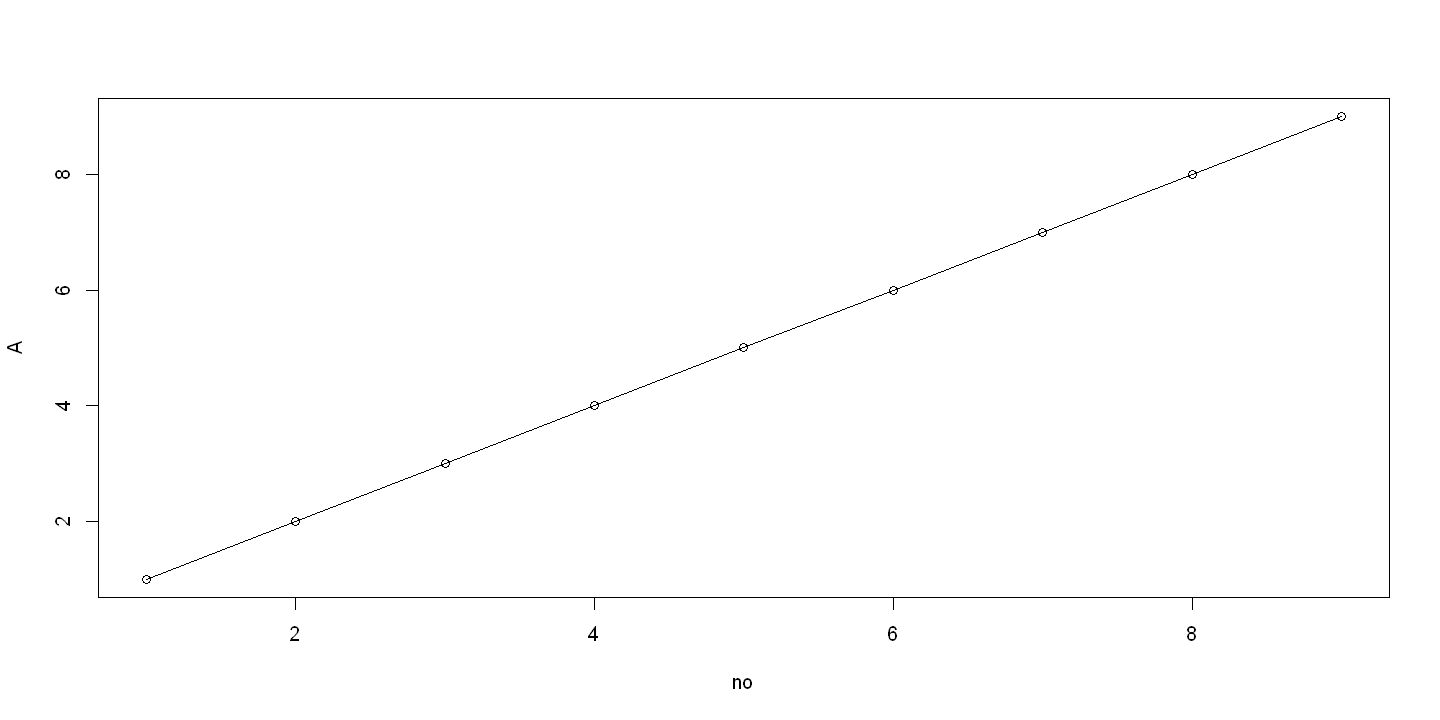

In [59]:
plot(df$A,type = 'o',xlab = "no",ylab = "A")

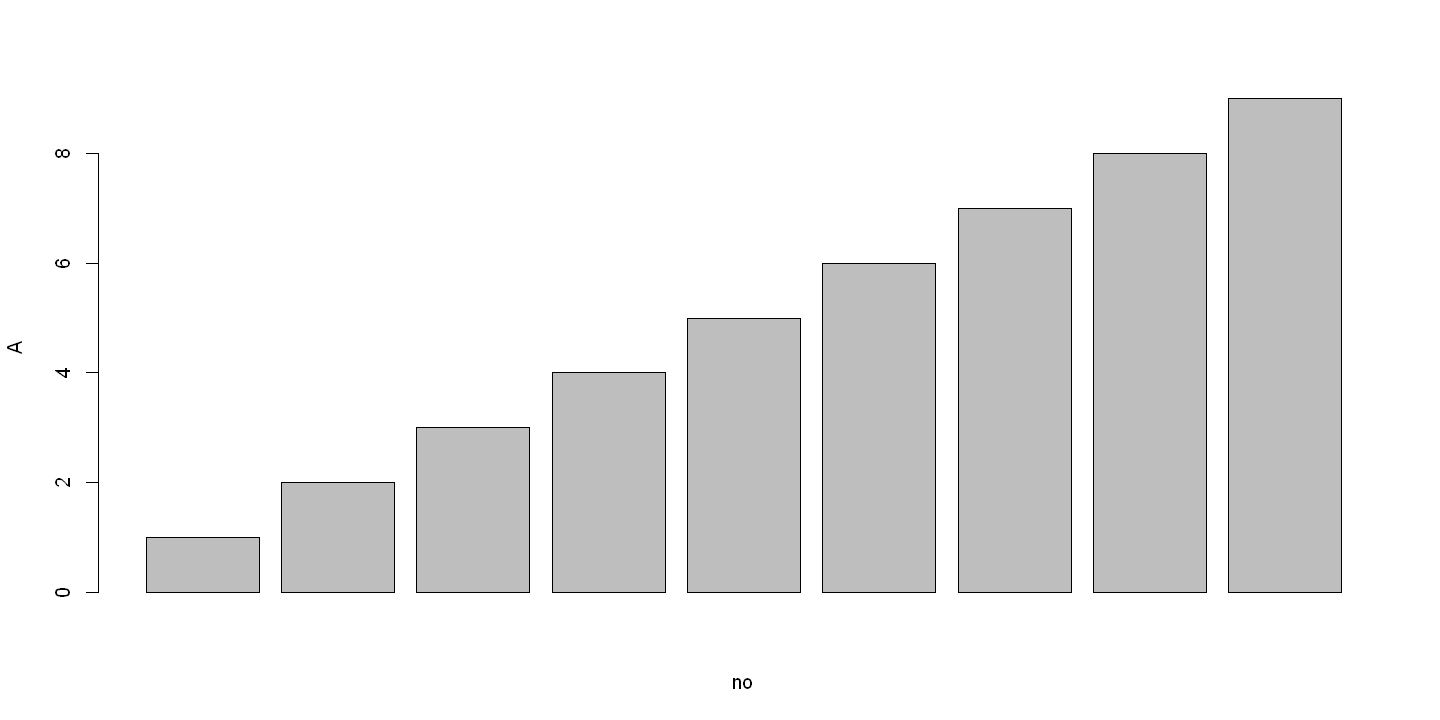

In [60]:
barplot(df$A, ylab = 'A',xlab = 'no')


---

**अस्वीकरण**:  
यो दस्तावेज़ AI अनुवाद सेवा [Co-op Translator](https://github.com/Azure/co-op-translator) प्रयोग गरी अनुवाद गरिएको हो। हामी यथासम्भव सटीकता सुनिश्चित गर्न प्रयास गर्छौं, तर कृपया ध्यान दिनुहोस् कि स्वचालित अनुवादहरूमा त्रुटि वा अशुद्धि हुन सक्छ। यसको मूल भाषामा रहेको मूल दस्तावेज़लाई आधिकारिक स्रोत मानिनुपर्छ। महत्त्वपूर्ण जानकारीका लागि, व्यावसायिक मानव अनुवाद सिफारिस गरिन्छ। यस अनुवादको प्रयोगबाट उत्पन्न हुने कुनै पनि गलतफहमी वा गलत व्याख्याका लागि हामी जिम्मेवार हुने छैनौं।
